In [1]:
%config Completer.use_jedi = False #for auto complete code

In [2]:
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

try:
    import flopy
except:
    fpth = os.path.abspath(os.path.join("..", ".."))
    sys.path.append(fpth)
    import flopy

from flopy.export import vtk

print(sys.version)
print("flopy version: {}".format(flopy.__version__))

np.set_printoptions(precision=4, suppress=True)

sys.path.insert(0, '../src/')

import warnings
warnings.filterwarnings('ignore')

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
flopy version: 3.3.5


In [3]:
model_name = 'regional_model'
model_path = '../examples/out/angascancha/model/'
exe_name = '../exe/mf6.exe'

In [4]:
#load the regional model
sim = flopy.mf6.MFSimulation.load(model_name+'.nam',sim_ws=model_path,exe_name=exe_name)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package disv...
    loading package ic...
    loading package npf...
    loading package rch...
    loading package evt...
    loading package drn...
    loading package oc...
  loading ims package regional_model...


In [5]:
workspace = '../examples/out/angascancha/vtk_files/'
if not os.path.isdir(workspace):
    os.makedirs(workspace, exist_ok=True)

In [6]:
gwf = sim.get_model()

In [7]:
gwf.get_package_list()

['DISV', 'IC', 'NPF', 'RCHA_0', 'EVTA_0', 'DRN_0', 'OC']

In [8]:
disv = gwf.get_package('DISV')

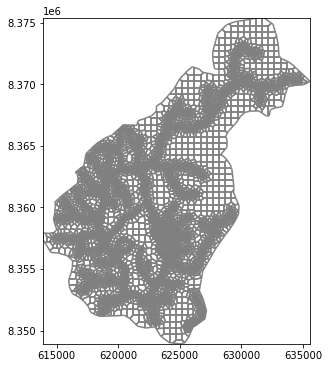

In [9]:
#plot aerial plot
fig, ax = plt.subplots(figsize=(14,6))
mapview = flopy.plot.PlotMapView(model=gwf)
linecollection = mapview.plot_grid()

In [10]:
model_output_dir = os.path.join(workspace, "model_output_test")

In [11]:
gwf.export(model_output_dir, fmt="vtk")

'../examples/out/angascancha/vtk_files/model_output_test'

In [ ]:
# import the HeadFile reader and read in the head file
from flopy.utils import HeadFile

head_file = os.path.join(model_path, model_name+".hds")
hds = HeadFile(head_file)


# create the vtk object and export heads
vtkobj = vtk.Vtk(gwf, xml=True, pvd=True, vertical_exageration=2)
vtkobj.add_heads(hds)
vtkobj.write(os.path.join(workspace, "heads_output_test", "regional_model_head.vtu"))